In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from matplotlib import pyplot as plt

# Cleaning

In [2]:
data_df = pd.read_csv("Dataset5.csv")
data_df

frame.time_relative  net_rf.channel  net_rf.signal_dbm  \
0                0.000000              12                -82   
1                0.067450              12                -83   
2                0.069746              12                -81   
3                0.083878              12                -82   
4                0.169710              12                -82   
...                   ...             ...                ...   
5357           118.980835              12                -70   
5358           119.060606              12                -80   
5359           119.068215              12                -79   
5360           119.069485               0                -69   
5361           119.104436               0                -82   

      net.advertising_header  net.advertising_header.packet_type  \
0                       3139                                   3   
1                       3267                                   3   
2                       8706                                   2   
3                       3139                                   3   
4                       3267                                   3   
...                      ...                                 ...   
5357                    3139                                   3   
5358                    3075                                   3   
5359                    8706                                   2   
5360                    8706                                   2   
5361                    5184                                   0   

      net.advertising_header.randomized_tx  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        1   
...                                    ...   
5357                                     1   
5358                                     0   
5359                                     0   
5360                                     0   
5361                                     1   

      net.advertising_header.randomized_rx  net.advertising_header.length  \
0                                        0                             12   
1                                        1                             12   
2                                        0                             34   
3                                        0                             12   
4                                        1                             12   
...                                    ...                            ...   
5357                                     0                             12   
5358                                     0                             12   
5359                                     0                             34   
5360                                     0                             34   
5361                                     0                             20   

         net.c_device     net.p_device   net.crc  ext.length  ext.type  \
0     101838850243208  211280412683407   7178533         0.0         0   
1     101838850243208  125548214461650  16005327         0.0         0   
2                   0  277092497346583  12239867        27.0       255   
3     101838850243208  211280412683407   7178533         0.0         0   
4     101838850243208  273118959487511   7331853         0.0         0   
...               ...              ...       ...         ...       ...   
5357  238312254637682  145964179777563   7730440         0.0         0   
5358  268911115226142   27412243401760   1198358         0.0         0   
5359                0  277092497346583  12239867        27.0       255   
5360                0  277092497346583  12239867        27.0       255   
5361                0  119177058949465   6564516        10.0       255   

      ext.company_id                                 

In [3]:
data_df.dtypes

frame.time_relative                     float64
net_rf.channel                            int64
net_rf.signal_dbm                         int64
net.advertising_header                    int64
net.advertising_header.packet_type        int64
net.advertising_header.randomized_tx      int64
net.advertising_header.randomized_rx      int64
net.advertising_header.length             int64
net.c_device                              int64
net.p_device                              int64
net.crc                                   int64
ext.length                              float64
ext.type                                  int64
ext.company_id                            int64
ext.data                                 object
dtype: object

In [4]:
data_df.drop(columns=["net_rf.channel", "net.crc", "ext.data"], inplace=True)

In [5]:
data_df["net.c_device"].unique()

array([101838850243208,               0, 273764994325324, 124868050207467,
       238312254637682, 268911115226142, 131001420539557, 137612971289500],
      dtype=int64)

In [6]:
data_df["net.p_device"].unique()

array([211280412683407, 125548214461650, 277092497346583, 273118959487511,
       272230718152631, 110856405487342, 171731499681458,  31463899423306,
       212199872156285, 119177058949465,    533334819041, 268911115226142,
       109444419444491, 110074348503449,  91121985582128, 121665505681796,
       141333368624525, 174255137009410, 109985358564979, 139277982189559,
        96237936318276, 145964179777563, 109401632185929, 121917041577174,
       101987620902637, 220268722468371,  63921506191981, 154455444750491,
       124584687199210, 102306008130641, 110371344522704, 121977601745303,
       245723193062163, 125057148042220, 279263986768633,  84137175688106,
       109121841239065, 136857840676939, 102988962272508, 106514678748794,
        27412243401760, 180528127998915,  86901532693034, 230684060774908,
       105648972753367, 139442850811973, 127031367801822, 121628416355032,
       100633201990642, 122988549901295], dtype=int64)

In [7]:
len(data_df.columns)

12

# Normalization

In [8]:
normal_data_df = StandardScaler().fit_transform(data_df)
normal_data_df

array([[-1.7491226 , -1.00531726, -0.76818039, ..., -0.74319147,
        -0.75890746, -0.72433928],
       [-1.74715585, -1.17394463, -0.71758597, ..., -0.74319147,
        -0.75890746, -0.72433928],
       [-1.7470889 , -0.83668989,  1.43228152, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       ...,
       [ 1.72274809, -0.49943515,  1.43228152, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       [ 1.72278512,  1.18683856,  1.43228152, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       [ 1.72380424, -1.00531726,  0.04014449, ...,  0.11375934,
         1.34217107,  0.72698899]])

# Dimensionality Reduction

In [9]:
pca_12 = PCA(n_components=12)
pca_data_12 = pca_12.fit_transform(normal_data_df)

In [10]:
sum(pca_12.explained_variance_ratio_)

0.9999999999999999

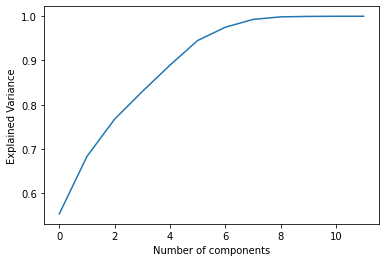

In [11]:
plt.plot(np.cumsum(pca_12.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [12]:
np.cumsum(pca_12.explained_variance_ratio_)

array([0.5532204 , 0.6832059 , 0.76739944, 0.82982721, 0.88952113,
       0.94517436, 0.97511693, 0.99282316, 0.99860439, 0.99959639,
       0.99999992, 1.        ])

In [13]:
pca_6 = PCA(n_components=6)
reduced_data_df = pca_6.fit_transform(normal_data_df)

In [14]:
reduced_data_df

array([[-1.58659797, -0.82919413,  1.6818585 ,  1.30694853, -0.30106456,
        -0.30102267],
       [-2.10587664, -0.96824783,  1.68985077, -0.02192886, -0.36312311,
         1.70740079],
       [ 3.76103677,  0.19835071,  1.57472381,  1.0061849 , -0.27587056,
         0.67099907],
       ...,
       [ 3.73135988,  0.43383336, -1.81111379,  0.39981098, -0.46247043,
         0.24688147],
       [ 3.71383421,  1.5381439 , -1.69497164, -0.30569287,  0.08767504,
        -0.36858823],
       [ 1.54661672, -2.2206551 , -1.35693048, -1.64644588, -1.17459842,
        -0.99078774]])

In [15]:
np.cumsum(pca_6.explained_variance_ratio_)

array([0.5532204 , 0.6832059 , 0.76739944, 0.82982721, 0.88952113,
       0.94517436])

# Clustering

### General Clustering

In [16]:
db = DBSCAN(eps=0.3, min_samples=20)
y_pred = db.fit_predict(reduced_data_df)

In [17]:
set(y_pred)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21}

In [18]:
silhouette_score(reduced_data_df, db.labels_, metric='euclidean')

0.10972303464448027

In [19]:
data_df["General Clustering"] = y_pred.tolist()
data_df

frame.time_relative  net_rf.signal_dbm  net.advertising_header  \
0                0.000000                -82                    3139   
1                0.067450                -83                    3267   
2                0.069746                -81                    8706   
3                0.083878                -82                    3139   
4                0.169710                -82                    3267   
...                   ...                ...                     ...   
5357           118.980835                -70                    3139   
5358           119.060606                -80                    3075   
5359           119.068215                -79                    8706   
5360           119.069485                -69                    8706   
5361           119.104436                -82                    5184   

      net.advertising_header.packet_type  \
0                                      3   
1                                      3   
2                                      2   
3                                      3   
4                                      3   
...                                  ...   
5357                                   3   
5358                                   3   
5359                                   2   
5360                                   2   
5361                                   0   

      net.advertising_header.randomized_tx  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        1   
...                                    ...   
5357                                     1   
5358                                     0   
5359                                     0   
5360                                     0   
5361                                     1   

      net.advertising_header.randomized_rx  net.advertising_header.length  \
0                                        0                             12   
1                                        1                             12   
2                                        0                             34   
3                                        0                             12   
4                                        1                             12   
...                                    ...                            ...   
5357                                     0                             12   
5358                                     0                             12   
5359                                     0                             34   
5360                                     0                             34   
5361                                     0                             20   

         net.c_device     net.p_device  ext.length  ext.type  ext.company_id  \
0     101838850243208  211280412683407         0.0         0               0   
1     101838850243208  125548214461650         0.0         0               0   
2                   0  277092497346583        27.0       255             117   
3     101838850243208  211280412683407         0.0         0               0   
4     101838850243208  273118959487511         0.0         0               0   
...               ...              ...         ...       ...             ...   
5357  238312254637682  145964179777563         0.0         0               0   
5358  268911115226142   27412243401760         0.0         0               0   
5359                0  277092497346583        27.0       255             117   
5360                0  277092497346583        27.0       255             117   
5361                0  119177058949465        10.0       255              76   

      General Clustering  
0                     -1  
1                      4  
2                      0  
3                     -1  
4                     -1  
...        

### Time-Based Clustering

In [20]:
time_df = data_df[["frame.time_relative"]]
time_df

frame.time_relative
0                0.000000
1                0.067450
2                0.069746
3                0.083878
4                0.169710
...                   ...
5357           118.980835
5358           119.060606
5359           119.068215
5360           119.069485
5361           119.104436

[5362 rows x 1 columns]

In [21]:
db = DBSCAN(eps=0.3, min_samples=20)
y_pred = db.fit_predict(time_df)

In [22]:
set(y_pred)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26}

In [23]:
silhouette_score(time_df, db.labels_, metric='euclidean')

0.43143100035977017

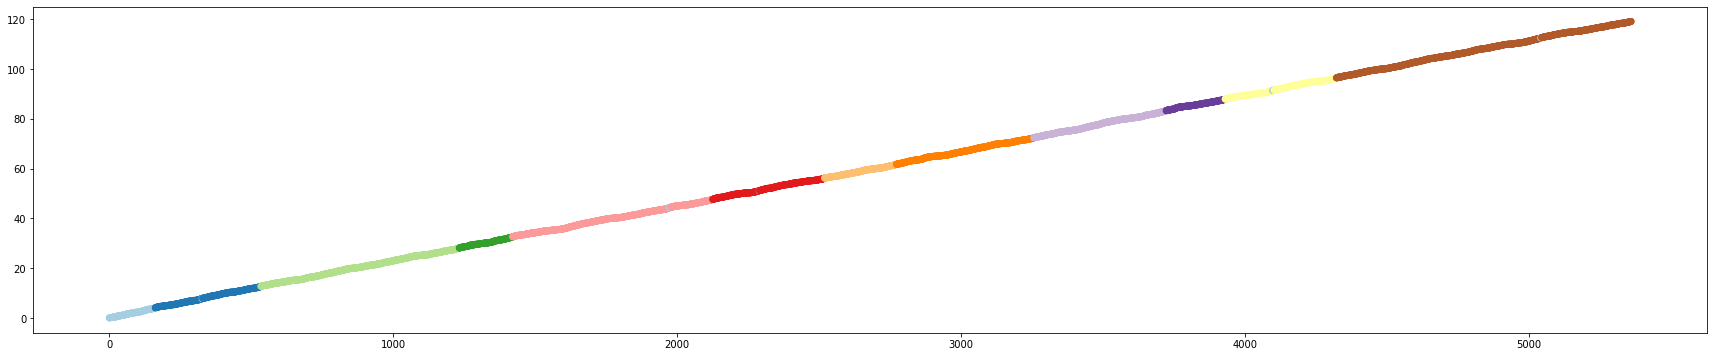

In [24]:
plt.figure(figsize=(30,6))
plt.scatter(time_df.index, time_df["frame.time_relative"], c=y_pred, cmap='Paired')

In [25]:
data_df["Time-Based Clustering"] = y_pred.tolist()
data_df

frame.time_relative  net_rf.signal_dbm  net.advertising_header  \
0                0.000000                -82                    3139   
1                0.067450                -83                    3267   
2                0.069746                -81                    8706   
3                0.083878                -82                    3139   
4                0.169710                -82                    3267   
...                   ...                ...                     ...   
5357           118.980835                -70                    3139   
5358           119.060606                -80                    3075   
5359           119.068215                -79                    8706   
5360           119.069485                -69                    8706   
5361           119.104436                -82                    5184   

      net.advertising_header.packet_type  \
0                                      3   
1                                      3   
2                                      2   
3                                      3   
4                                      3   
...                                  ...   
5357                                   3   
5358                                   3   
5359                                   2   
5360                                   2   
5361                                   0   

      net.advertising_header.randomized_tx  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        1   
...                                    ...   
5357                                     1   
5358                                     0   
5359                                     0   
5360                                     0   
5361                                     1   

      net.advertising_header.randomized_rx  net.advertising_header.length  \
0                                        0                             12   
1                                        1                             12   
2                                        0                             34   
3                                        0                             12   
4                                        1                             12   
...                                    ...                            ...   
5357                                     0                             12   
5358                                     0                             12   
5359                                     0                             34   
5360                                     0                             34   
5361                                     0                             20   

         net.c_device     net.p_device  ext.length  ext.type  ext.company_id  \
0     101838850243208  211280412683407         0.0         0               0   
1     101838850243208  125548214461650         0.0         0               0   
2                   0  277092497346583        27.0       255             117   
3     101838850243208  211280412683407         0.0         0               0   
4     101838850243208  273118959487511         0.0         0               0   
...               ...              ...         ...       ...             ...   
5357  238312254637682  145964179777563         0.0         0               0   
5358  268911115226142   27412243401760         0.0         0               0   
5359                0  277092497346583        27.0       255             117   
5360                0  277092497346583        27.0       255             117   
5361                0  119177058949465        10.0       255              76   

      General Clustering  Time-Based Clustering  
0                     -1                      0  
1                      4                      0  
2                      

### Packet-Based Clustering

In [26]:
packet_df = data_df[["net.advertising_header", "net.advertising_header.packet_type", "net.advertising_header.randomized_tx", "net.advertising_header.randomized_rx", "net.advertising_header.length", "ext.length", "ext.type", "ext.company_id"]]

Normalization

In [27]:
normal_packet_df = StandardScaler().fit_transform(packet_df)
normal_packet_df

array([[-0.76818039,  0.57525159,  0.75385332, ..., -0.74319147,
        -0.75890746, -0.72433928],
       [-0.71758597,  0.57525159,  0.75385332, ..., -0.74319147,
        -0.75890746, -0.72433928],
       [ 1.43228152, -0.4008557 , -1.32651801, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       ...,
       [ 1.43228152, -0.4008557 , -1.32651801, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       [ 1.43228152, -0.4008557 , -1.32651801, ...,  1.57057572,
         1.34217107,  1.5099424 ],
       [ 0.04014449, -2.35307028,  0.75385332, ...,  0.11375934,
         1.34217107,  0.72698899]])

Dimensionality Reduction

In [28]:
pca_7 = PCA(n_components=7)
pca_data_7 = pca_7.fit_transform(normal_packet_df)
sum(pca_7.explained_variance_ratio_)

0.9999998830702991

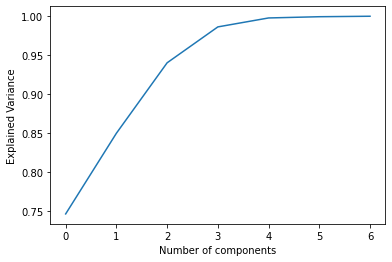

In [29]:
plt.plot(np.cumsum(pca_7.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [30]:
np.cumsum(pca_7.explained_variance_ratio_)

array([0.74603051, 0.84967908, 0.94018895, 0.98630924, 0.99780213,
       0.99938939, 0.99999988])

In [31]:
pca_3 = PCA(n_components=3)
reduced_packet_df = pca_3.fit_transform(normal_packet_df)
reduced_packet_df

array([[-1.74224482,  0.48119237,  0.86493171],
       [-2.22144324, -0.67551638, -1.02424103],
       [ 3.54844492, -0.52493554,  0.08069532],
       ...,
       [ 3.54844492, -0.52493554,  0.08069532],
       [ 3.54844492, -0.52493554,  0.08069532],
       [ 1.33986733,  2.36902021, -1.08499187]])

In [32]:
np.cumsum(pca_3.explained_variance_ratio_)

array([0.74603051, 0.84967908, 0.94018895])

Clustering

In [33]:
db = DBSCAN(eps=0.3, min_samples=20)
y_pred = db.fit_predict(reduced_packet_df)

In [34]:
set(y_pred)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [35]:
silhouette_score(reduced_packet_df, db.labels_, metric='euclidean')

0.9941931436220719

In [36]:
data_df["Packet-Based Clustering"] = y_pred.tolist()
data_df

frame.time_relative  net_rf.signal_dbm  net.advertising_header  \
0                0.000000                -82                    3139   
1                0.067450                -83                    3267   
2                0.069746                -81                    8706   
3                0.083878                -82                    3139   
4                0.169710                -82                    3267   
...                   ...                ...                     ...   
5357           118.980835                -70                    3139   
5358           119.060606                -80                    3075   
5359           119.068215                -79                    8706   
5360           119.069485                -69                    8706   
5361           119.104436                -82                    5184   

      net.advertising_header.packet_type  \
0                                      3   
1                                      3   
2                                      2   
3                                      3   
4                                      3   
...                                  ...   
5357                                   3   
5358                                   3   
5359                                   2   
5360                                   2   
5361                                   0   

      net.advertising_header.randomized_tx  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        1   
...                                    ...   
5357                                     1   
5358                                     0   
5359                                     0   
5360                                     0   
5361                                     1   

      net.advertising_header.randomized_rx  net.advertising_header.length  \
0                                        0                             12   
1                                        1                             12   
2                                        0                             34   
3                                        0                             12   
4                                        1                             12   
...                                    ...                            ...   
5357                                     0                             12   
5358                                     0                             12   
5359                                     0                             34   
5360                                     0                             34   
5361                                     0                             20   

         net.c_device     net.p_device  ext.length  ext.type  ext.company_id  \
0     101838850243208  211280412683407         0.0         0               0   
1     101838850243208  125548214461650         0.0         0               0   
2                   0  277092497346583        27.0       255             117   
3     101838850243208  211280412683407         0.0         0               0   
4     101838850243208  273118959487511         0.0         0               0   
...               ...              ...         ...       ...             ...   
5357  238312254637682  145964179777563         0.0         0               0   
5358  268911115226142   27412243401760         0.0         0               0   
5359                0  277092497346583        27.0       255             117   
5360                0  277092497346583        27.0       255             117   
5361                0  119177058949465        10.0       255              76   

      General Clustering  Time-Based Clustering  Packet-Based Clustering  
0                     -1                      0                        0  
1                      

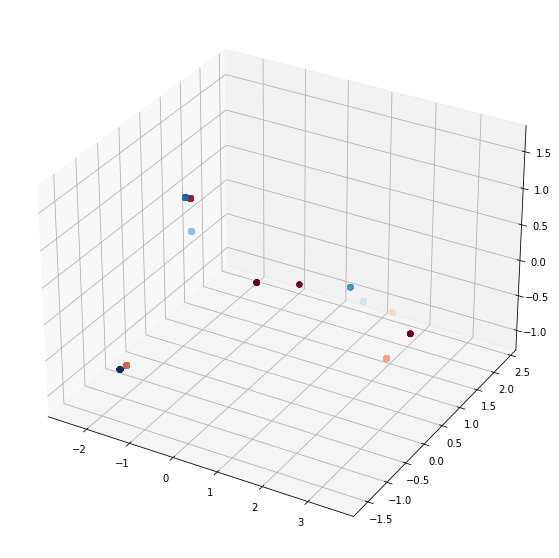

In [48]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = reduced_packet_df[:, 0]
y = reduced_packet_df[:, 1]
z = reduced_packet_df[:, 2]

ax.scatter(x,y,z, c=data_df["Packet-Based Clustering"], s=30, cmap="RdBu")

plt.show()

### Device-Based Clustering

In [38]:
device_df = data_df[["net_rf.signal_dbm", "net.c_device", "net.p_device"]]

Normalization

In [39]:
normal_device_df = StandardScaler().fit_transform(device_df)
normal_device_df

array([[-1.00531726, -0.0559943 ,  0.26077839],
       [-1.17394463, -0.0559943 , -0.7419546 ],
       [-0.83668989, -1.00415244,  1.0305236 ],
       ...,
       [-0.49943515, -1.00415244,  1.0305236 ],
       [ 1.18683856, -1.00415244,  1.0305236 ],
       [-1.00531726, -1.00415244, -0.81647232]])

Clustering

In [40]:
db = DBSCAN(eps=0.3, min_samples=20)
y_pred = db.fit_predict(normal_device_df)

In [41]:
set(y_pred)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [42]:
silhouette_score(normal_device_df, db.labels_, metric='euclidean')

0.6630405577415959

In [43]:
data_df["Device-Based Clustering"] = y_pred.tolist()
data_df

frame.time_relative  net_rf.signal_dbm  net.advertising_header  \
0                0.000000                -82                    3139   
1                0.067450                -83                    3267   
2                0.069746                -81                    8706   
3                0.083878                -82                    3139   
4                0.169710                -82                    3267   
...                   ...                ...                     ...   
5357           118.980835                -70                    3139   
5358           119.060606                -80                    3075   
5359           119.068215                -79                    8706   
5360           119.069485                -69                    8706   
5361           119.104436                -82                    5184   

      net.advertising_header.packet_type  \
0                                      3   
1                                      3   
2                                      2   
3                                      3   
4                                      3   
...                                  ...   
5357                                   3   
5358                                   3   
5359                                   2   
5360                                   2   
5361                                   0   

      net.advertising_header.randomized_tx  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        1   
...                                    ...   
5357                                     1   
5358                                     0   
5359                                     0   
5360                                     0   
5361                                     1   

      net.advertising_header.randomized_rx  net.advertising_header.length  \
0                                        0                             12   
1                                        1                             12   
2                                        0                             34   
3                                        0                             12   
4                                        1                             12   
...                                    ...                            ...   
5357                                     0                             12   
5358                                     0                             12   
5359                                     0                             34   
5360                                     0                             34   
5361                                     0                             20   

         net.c_device     net.p_device  ext.length  ext.type  ext.company_id  \
0     101838850243208  211280412683407         0.0         0               0   
1     101838850243208  125548214461650         0.0         0               0   
2                   0  277092497346583        27.0       255             117   
3     101838850243208  211280412683407         0.0         0               0   
4     101838850243208  273118959487511         0.0         0               0   
...               ...              ...         ...       ...             ...   
5357  238312254637682  145964179777563         0.0         0               0   
5358  268911115226142   27412243401760         0.0         0               0   
5359                0  277092497346583        27.0       255             117   
5360                0  277092497346583        27.0       255             117   
5361                0  119177058949465        10.0       255              76   

      General Clustering  Time-Based Clustering  Packet-Based Clustering  \
0                     -1                      0                        0   
1                    

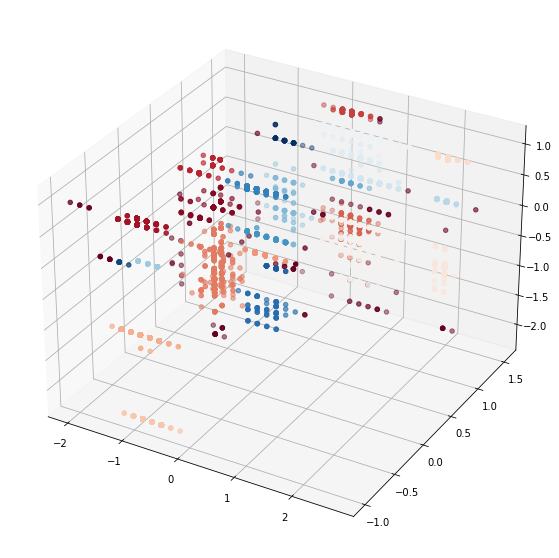

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = normal_device_df[:, 0]
y = normal_device_df[:, 1]
z = normal_device_df[:, 2]

ax.scatter(x,y,z, c=data_df["Device-Based Clustering"], s=20, cmap="RdBu")

plt.show()

# Writing Results to CSV

In [50]:
data_df.to_csv("Clustered Data.csv", index=False)